In [1]:
import numpy as np
from scipy.interpolate import griddata
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely.geometry

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
nysm_df = pd.read_csv("/home/aevans/nwp_bias/src/landtype/data/nysm.csv")
nysm_df

,stid,number,name,lat [degrees],lon [degrees],elevation [m],county,nearest_city,state,distance_from_town [km],direction_from_town [degrees],climate_division,climate_division_name,wfo,commissioned,decommissioned
0,ADDI,107,Addison,42.040360,-77.237260,507.6140,Steuben,Addison,NY,6.9,S,1,Western Plateau,BGM,2016-08-10 18:15:00 UTC,NaN
1,ANDE,111,Andes,42.182270,-74.801390,518.2820,Delaware,Andes,NY,1.5,WSW,2,Eastern Plateau,BGM,2016-08-04 15:55:00 UTC,NaN
2,BATA,24,Batavia,43.019940,-78.135660,276.1200,Genesee,Batavia,NY,4.9,ENE,9,Great Lakes,BUF,2016-02-18 18:40:00 UTC,NaN
3,BEAC,76,Beacon,41.528750,-73.945270,90.1598,Dutchess,Beacon,NY,3.3,NE,5,Hudson Valley,ALY,2016-08-22 16:45:00 UTC,NaN
4,BELD,90,Belden,42.223220,-75.668520,470.3700,Broome,Belden,NY,2.2,NNE,2,Eastern Plateau,BGM,2015-11-30 20:20:00 UTC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,WFMB,14,Whiteface Mountain Base,44.393236,-73.858829,614.5990,Essex,Wilmington,NY,3.5,W,3,Northern Plateau,BTV,2016-01-29 20:55:00 UTC,NaN
122,WGAT,123,Woodgate,43.532408,-75.158597,442.9660,Oneida,Woodgate,NY,1.4,NNW,3,Northern Plateau,BGM,2016-08-29 18:20:00 UTC,NaN
123,WHIT,10,Whitehall,43.485073,-73.423071,36.5638,Washington,Whitehall,NY,8.0,S,7,Champlain Valley,ALY,2015-08-26 20:30:00 UTC,NaN
124,WOLC,79,Wolcott,43.228680,-76.842610,121.2190,Wayne,Wolcott,NY,2.4,WNW,9,Great Lakes,BUF,2016-03-09 18:10:00 UTC,NaN


In [3]:
# create variables for indexing purposes
Long = nysm_df["lon [degrees]"]
Lat = nysm_df["lat [degrees]"]
Elev = nysm_df["elevation [m]"];

In [4]:
# creating a matrix to reference for z-points
[x, y] = np.meshgrid(
    np.linspace(np.min(Long), np.max(Long), 124),
    np.linspace(np.min(Lat), np.max(Lat), 124),
)

# calculate z points using a linear method
z = griddata((Long, Lat), Elev, (x, y), method="linear")
intz = z
x = np.matrix.flatten(x)
# Gridded longitude
y = np.matrix.flatten(y)
# Gridded latitude
z = np.matrix.flatten(z);  # Gridded elevation

In [5]:
print(len(x), len(y), len(z))

15376 15376 15376


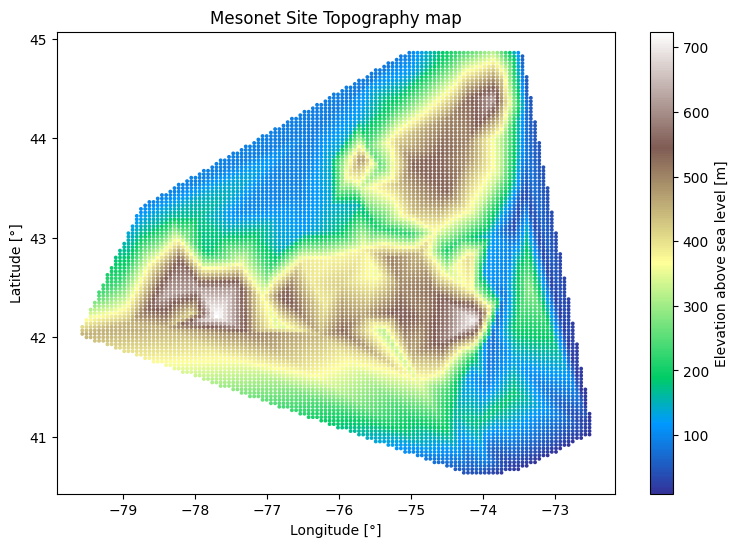

In [11]:
plt.figure(figsize=(9, 6))
plt.title("Mesonet Site Topography map")
plt.xlabel("Longitude [°]")
plt.ylabel("Latitude [°]")
# plt.gca().set_aspect('equal')
plt.scatter(x, y, 3, z, cmap="terrain")
plt.colorbar(label="Elevation above sea level [m]")

In [12]:
len(z)

15376

In [13]:
shapefile = "/home/aevans/nwp_bias/src/landtype/data/State.dbf"
df = gpd.read_file(shapefile)

In [57]:
# Set the geometry column to lon-lat
df = df.set_geometry("geometry")

# Convert the coordinates to lat-lon
df = df.to_crs("EPSG:4326")

In [70]:
from IPython import embed
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from shapely.geometry import Point
import cartopy
import rasterio

In [73]:
from geopandas import GeoDataFrame
from shapely.geometry import Point


["lon [degrees]"]
Lat = nysm_df["lat [degrees]"]
Elev = nysm_df["elevation [m]"]

geometry = [Point(xy) for xy in zip(x.squeeze(), y.squeeze())]
sdf = pd.DataFrame()
sdf["x"] = x
sdf["y"] = y
sdf["z"] = z
gdf = GeoDataFrame(sdf, crs="EPSG:4326", geometry=geometry)

In [76]:
gdf

,x,y,z,geometry
0,-79.624080,40.604014,NaN,POINT (-79.62408 40.60401)
1,-79.565883,40.604014,NaN,POINT (-79.56588 40.60401)
2,-79.507686,40.604014,NaN,POINT (-79.50769 40.60401)
3,-79.449489,40.604014,NaN,POINT (-79.44949 40.60401)
4,-79.391292,40.604014,NaN,POINT (-79.39129 40.60401)
...,...,...,...,...
15371,-72.698652,44.895650,NaN,POINT (-72.69865 44.89565)
15372,-72.640455,44.895650,NaN,POINT (-72.64045 44.89565)
15373,-72.582258,44.895650,NaN,POINT (-72.58226 44.89565)
15374,-72.524061,44.895650,NaN,POINT (-72.52406 44.89565)


In [101]:
# If you just want to points inside polygons:
gridinside = gpd.sjoin(gpd.GeoDataFrame(gdf), df[["geometry"]], how="inner")

In [102]:
gridinside

,x,y,z,geometry,mask,index_right
94,-74.153573,40.604014,NaN,POINT (-74.15357 40.60401),False,0
95,-74.095377,40.604014,NaN,POINT (-74.09538 40.60401),False,0
96,-74.037180,40.604014,NaN,POINT (-74.03718 40.60401),False,0
97,-73.978983,40.604014,NaN,POINT (-73.97898 40.60401),False,0
98,-73.920786,40.604014,NaN,POINT (-73.92079 40.60401),False,0
...,...,...,...,...,...,...
15355,-73.629802,44.895650,NaN,POINT (-73.62980 44.89565),False,0
15356,-73.571605,44.895650,NaN,POINT (-73.57160 44.89565),False,0
15357,-73.513408,44.895650,NaN,POINT (-73.51341 44.89565),False,0
15358,-73.455211,44.895650,NaN,POINT (-73.45521 44.89565),False,0


([], [])

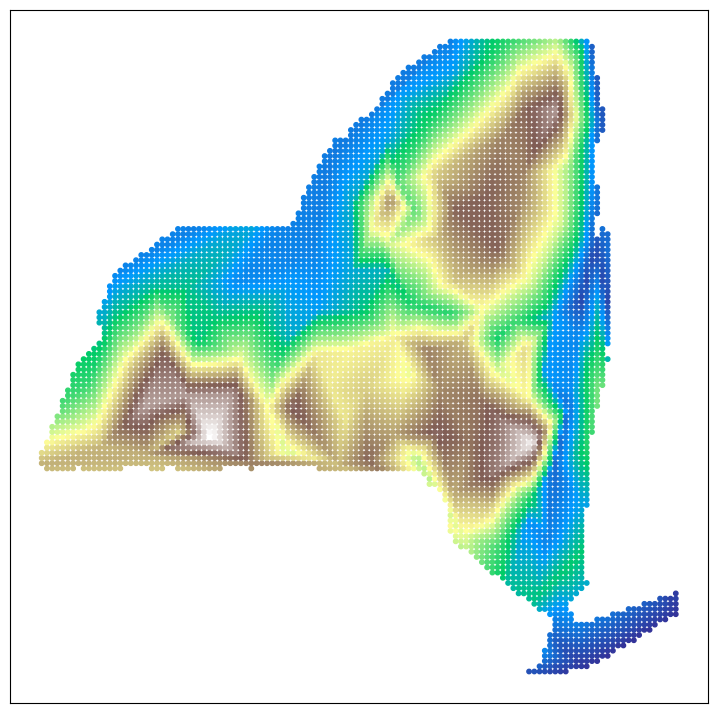

In [117]:
plt.figure(figsize=(9, 9))
plt.scatter(gridinside["x"], gridinside["y"], 10, gridinside["z"], cmap="terrain")
plt.xticks([])
plt.yticks([])

# Spatial Compression Layer

To prepare a dataset from such a structure, PyTorch provides ImageFolder class which makes the task easy for us to prepare the dataset. We simply have to pass the directory of our data to it and it provides the dataset which we can use to train the model.

In [96]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

"""
#train and test data directory
data_dir = "../input/intel-image-classification/seg_train/seg_train/"
test_data_dir = "../input/intel-image-classification/seg_test/seg_test"


#load the train and test data
dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))
test_dataset = ImageFolder(test_data_dir,transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))
"""

'\n#train and test data directory\ndata_dir = "../input/intel-image-classification/seg_train/seg_train/"\ntest_data_dir = "../input/intel-image-classification/seg_test/seg_test"\n\n\n#load the train and test data\ndataset = ImageFolder(data_dir,transform = transforms.Compose([\n    transforms.Resize((150,150)),transforms.ToTensor()\n]))\ntest_dataset = ImageFolder(test_data_dir,transforms.Compose([\n    transforms.Resize((150,150)),transforms.ToTensor()\n]))\n'

The torchvision.transforms module provides various functionality to preprocess the images, here first we resize the image for (150*150) shape and then transforms them into tensors.